# Create Custom MSA's for Boltz-1

## Imports

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

## Load Data

In [2]:
epitope_data = pd.read_csv('../data/processed/dataset_w_cdr_annotation.csv')
display(epitope_data)

,Antibody Name,Epitope Group,source,D614G,BA.1,BA.2,BA.2.75,BA.5,BQ.1.1,XBB,...,clus_vh,clus_vl,connected,partition,CDRH1,CDRH2,CDRH3,CDRL1,CDRL2,CDRL3
0,BD-196,C,WT convalescents,1.93,>10,>10,>10,>10,>10,>10,...,1442,682,0,Validation,GYTF----TSYA,INAG--NGNT,ASRREQWLGDLGYYYYGMDV,QSLVYS-DGNTY,KV-------S,MQGTH----SPWT
1,BD-218,A,WT convalescents,0.0104,0.00849,0.00937,0.0116,5.26,>10,>10,...,1443,508,1,Train,GGSF----SDYF,INHS---GST,ARGQGYGRVLLWFGE,QSV------SSY,DA-------S,QQRS-----NWIT
2,BD-236,A,WT convalescents,0.0173,>10,>10,>10,>10,>10,>10,...,595,591,1,Test,GITV----SSNY,IYSG---GST,ARDLGE-AGGMDV,QGI------SSY,AA-------S,QQLNS----YPPA
3,BD-254,C,WT convalescents,0.25,>10,>10,>10,>10,>10,>10,...,1444,683,2,Validation,GFTL----SSYA,VSGS--GGST,ALPTGASSSYSGPNY,TGAVT---SGHY,DT-------S,LLSYS---GAYVL
4,BD-255,B,WT convalescents,0.113,>10,>10,>10,>10,>10,>10,...,1450,684,3,Validation,GFTF----SNYD,ISSD--GNNR,ARDEVIAVATGEGMDV,QSV------TRN,GA-------S,QQYSN---WPLYT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3046,BD55-6726,E2.2,SARS convalescents,>10,>10,>10,>10,>10,>10,>10,...,2157,913,807,Validation,GFTF----SSSA,MAVG--GADR,AAMVRGGWWYFDL,QSV------HNY,DA-------S,QQRSD----WPWT
3047,BD55-6727,F2,SARS convalescents,0.293,4.37,>10,>10,>10,>10,>10,...,2158,456,1,Train,GFTF----SDYY,ISSG--GGTI,ASDPGGLSELAAEYFHH,QSI------SNY,AA-------S,QQSHS----TPYT
3048,BD55-6728,F1,SARS convalescents,>10,>10,>10,>10,>10,>10,>10,...,2159,456,1,Train,GFTF----SRFA,ISSN--GGST,ARESTEVTHWYFDL,QTI------SRY,AA-------S,QQSYV---TPEYT
3049,BD55-6729,F1,SARS convalescents,>10,>10,>10,>10,>10,>10,>10,...,2160,914,808,Validation,GYTF----STYG,ISPH--NGDP,ARQLLFFGDLSGDNGMDV,AVA------TQF,KD-------T,QSADS----RGVV


In [3]:
large_dataset = pd.read_csv('../data/processed/covabdab_w_cdr_annotation.csv', index_col=0)
# large_dataset[[]]
# large_dataset.dropna(subset=['VHorVHH', 'VL'])
display(large_dataset)

,Name,VHorVHH,VL,Structures,CDRH1,CDRH2,CDRH3,CDRL1,CDRL2,CDRL3
index,,,,,,,,,,
0,002-02,EVQLVESGGGLVQPGGSLRLSCAASEITVSRNYMSWVRQAPGKGLE...,EIVLTQSPGTLSLSPGERATLSCRASQSISSYLAWYQQKPGQAPRL...,PDB entry 7U0Q [PDB][SAbDab],EITV----SRNY,IYSG---GST,ARDYGD--FYFDY,QSI------SSY,GA-------S,QQYGS----SPRT
1,002-13,QVQLVESGGGVVQPGRSLRLSCAASGFTFRSYGMHWVRQAPGKGLE...,NFMLTQPHSVSESPGKTVTISCTRNSGSIASNYVQWYQQRPGSAPT...,PDB entry 7U0X [PDB][SAbDab],GFTF----RSYG,ISYD--GSDK,ARDLSAGHCTGGVCYTAGGIDY,SGSI----ASNY,ED-------N,HSYDS----DNVV
2,002-14,QVQLVESGGGVVQPGRSLRLSCAASGFTFRHYGMHWVRQAPGKGLE...,DIQMTQSPSSLSASVGDRVTITCQASQDIGNYLNWYQQKPGKAPKL...,ND,GFTF----RHYG,ISYD--GSDK,AKVQGTYCSGGSCYSGSFDY,QDI------GNY,DA-------S,QQYF-----NLPT
3,002-18,EVQLVESGGGLVQPGGSLRLSCAGSGFTFSTYWMSWVRQAPGKGLE...,DIQMTQSPSSLSASVGDRVTITCRASQGISNSLAWYQQKTGKAPKL...,ND,GFTF----STYW,IKQD--GSEK,ARDLGVLWFGELTNAFDP,QGI------SNS,GA-------S,QQYYS---TPPRT
4,002-37,EVQLVESGGGLVQPGGSLRLSCAASGFTFSSYDMHWVRQATGKGLE...,DIQMTQSPSSLSASVGDRVTITCRASQSISSYLNWYQQKPGKAPKL...,ND,GFTF----SSYD,IGTG---GDT,ARGSSAATIVLDY,QSI------SSY,AA-------S,QQSYI---TPEYT
...,...,...,...,...,...,...,...,...,...,...
7860,ZWC10,EVQLVESGGGVVQPGRSLRLSCAASGFTFSAYGVHWVRQAPGKGLE...,AIRMTQSPASLSASVGDRITITCRASQSISSYLNWYQHKPGKAPKL...,ND,GFTF----SAYG,ISDD--GTIK,ARDEQKDRAMVTLPDY,QSI------SSY,AA-------S,QQSYN---TPPWT
7861,ZWC12,EVQLVESGGALVQPGGSLRLSCAASGFTFANYAMSWVRQAPGKGLE...,DIQMTQSPFSLSVSPGERATLSCRASQSVSTNLAWYQQKPGQAPRL...,ND,GFTF----ANYA,MTGS--SIDS,AKGELLWFGDLLHNWFDP,QSV------STN,GA-------S,QQYDS----WPGT
7862,ZWC6,EVQLVESGGGVVQPGTSLRLSCAASGFSFSHYVMYWVRQAPGKGLD...,AIRMTQSPPTLSLSPGERATLSCRASQSVTNYLVWYQQKPGQAPRL...,PDB entry 7WWM [PDB][SAbDab],GFSF----SHYV,ISFD--GSSQ,AIHGGTYYYDKNILA,QSV------TNY,DT-------F,QQRSN----WPPT


In [4]:
embed_dir = '/home/azureuser/cloudfiles/code/Users/s184243/AI4ProtEng_AIntibody/data/interim/'
with open(os.path.join(embed_dir, 'cova_embed_EMS_3B_together'), 'rb') as f:
    esm_output = pickle.load(f)


In [5]:
def extract_cdr_mean_pool(df, embedding):
    hc_embedding_list = []
    lc_embedding_list = []

    for i, (index, row) in enumerate(df.iterrows()):
        hc_seq = row['VHorVHH']
        lc_seq = row['VL']

        hc_cdrs = row[[f'CDRH{i+1}' for i in range(3)]]
        lc_cdrs = row[[f'CDRL{i+1}' for i in range(3)]]

        hc_cdr_index = [(hc_seq.index(cdr.replace('-', '')), hc_seq.index(cdr.replace('-', ''))+len(cdr)) for cdr in hc_cdrs]
        lc_cdr_index = [(lc_seq.index(cdr.replace('-', '')), lc_seq.index(cdr.replace('-', ''))+len(cdr)) for cdr in lc_cdrs]

        hc_embedding = embedding[index][1:len(hc_seq)+1].numpy()
        cdr_mean = np.concatenate([hc_embedding[hc_cdr_index[0][0]:hc_cdr_index[0][1]],
                                    hc_embedding[hc_cdr_index[1][0]:hc_cdr_index[1][1]],
                                    hc_embedding[hc_cdr_index[2][0]:hc_cdr_index[2][1]]]).mean(axis=0)
        hc_embedding_list.append(cdr_mean)

        lc_embedding = embedding[index][len(hc_seq)+2:len(hc_seq)+2+len(lc_seq)+1].numpy()
        cdr_mean = np.concatenate([lc_embedding[lc_cdr_index[0][0]:lc_cdr_index[0][1]],
                                    lc_embedding[lc_cdr_index[1][0]:lc_cdr_index[1][1]],
                                    lc_embedding[lc_cdr_index[2][0]:lc_cdr_index[2][1]]]).mean(axis=0)
        lc_embedding_list.append(cdr_mean)

    hc_embedding_array = np.stack(hc_embedding_list)
    lc_embedding_array = np.stack(lc_embedding_list)

    X = np.concatenate([hc_embedding_array, lc_embedding_array], axis=1)

    return X

In [8]:
embeddings = esm_output['representations'][36]
X = extract_cdr_mean_pool(large_dataset, embeddings)

In [9]:
X.shape

(7182, 5120)

## Predict epitope clusters

In [10]:
with open('../models/automl.pkl', 'rb') as f:
    automl = pickle.load(f)

In [11]:
predicted_epitopes = automl.predict(X)

In [12]:
large_dataset['Predicted Epitope'] = predicted_epitopes

In [13]:
large_dataset.value_counts('Predicted Epitope')

Predicted Epitope
E3      2058
E2.2    1950
A        955
F2       651
F1       644
C        360
E2.1     170
D1       122
B        111
D2        91
E1        56
F3        14
Name: count, dtype: int64

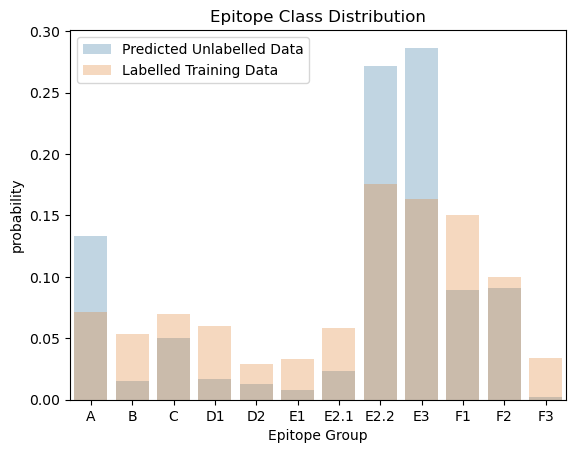

In [14]:
sns.countplot(data=large_dataset, x='Predicted Epitope', stat='probability', order=sorted(large_dataset['Predicted Epitope'].unique()), label='Predicted Unlabelled Data', alpha=0.3)
sns.countplot(data=epitope_data, x='Epitope Group', stat='probability', order=sorted(epitope_data['Epitope Group'].unique()), label='Labelled Training Data', alpha=0.3)
plt.title('Epitope Class Distribution')
plt.xlabel('Epitope Group')
plt.show()

## Create MSA's for structures

In [14]:
fasta_dir = '../data/interim/epitope_fastas_H/'
os.makedirs(fasta_dir, exist_ok=True)
for group in large_dataset['Predicted Epitope'].unique():
    print(group)
    with open(os.path.join(fasta_dir, group + '_H.fasta'), 'w') as f:
        for index, row in large_dataset[large_dataset['Predicted Epitope'] == group].iterrows():
            f.write(f'>{row['Name']}\n{row['VHorVHH']}\n')
    # with open()


A
F2
E3
E2.2
F1
C
D2
E1
B
E2.1
D1
F3


In [15]:
fasta_dir = '../data/interim/epitope_fastas_L'
os.makedirs(fasta_dir, exist_ok=True)
for group in large_dataset['Predicted Epitope'].unique():
    print(group)
    with open(os.path.join(fasta_dir, group + '_L.fasta'), 'w') as f:
        for index, row in large_dataset[large_dataset['Predicted Epitope'] == group].iterrows():
            f.write(f'>{row['Name']}\n{row['VL']}\n')

A
F2
E3
E2.2
F1
C
D2
E1
B
E2.1
D1
F3


make Query fasta files:

In [16]:
query_path_H = '../data/interim/queries_H'
query_path_L = '../data/interim/queries_L'
os.makedirs(query_path_H, exist_ok=True)
os.makedirs(query_path_L, exist_ok=True)

In [17]:
struc_dict = dict()
for ab_name, vh, vl, struc_name, epitope_group in large_dataset.dropna(subset='Structures')[['Name', 'VHorVHH', 'VL', 'Structures', 'Predicted Epitope']].values:
    struc_name_list = struc_name.split(' ')
    if 'ND' in struc_name:
        continue
    if len(struc_name_list) < 3:
        continue
    name = struc_name.split(' ')[2]
    struc_dict[name] = ab_name

    with open(os.path.join(query_path_H, name + f'_{epitope_group}_H.fasta'), 'w') as f:
        f.write(f'>{name}_H\n{vh}')

    with open(os.path.join(query_path_L, name + f'_{epitope_group}_L.fasta'), 'w') as f:
        f.write(f'>{name}_L\n{vl}')

    # with open(os.path.join('../data/interim/boltz_input/', name + '.fasta'), 'w') as f:
    #     f.write(f'>VH|protein\n{vh}\n>VL|protein\n{vl}\n>RBD|protein\n{rbd_seq}\n')

In [18]:
rbd_seq = 'RVQPTESIVRFPNITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTGKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYLYRLFRKSNLKPFERDISTEIYQAGSTPCNGVEGFNCYFPLQSYGFQPTNGVGYQPYRVVVLSFELLHAPATVCGPKKSTNLVKNKCVNF'
struc_dict = dict()
os.makedirs('../data/interim/boltz_input', exist_ok=True)
for ab_name, vh, vl, struc_name in large_dataset.dropna(subset='Structures')[['Name', 'VHorVHH', 'VL', 'Structures']].values:
    struc_name_list = struc_name.split(' ')
    if 'ND' in struc_name:
        continue
    if len(struc_name_list) < 3:
        continue
    name = struc_name.split(' ')[2]
    struc_dict[name] = ab_name
    with open(os.path.join('../data/interim/boltz_input/', name + '.fasta'), 'w') as f:
        f.write(f'>VH|protein\n{vh}\n>VL|protein\n{vl}\n>RBD|protein\n{rbd_seq}\n')

mmseqs commands:

```bash
mmseqs createdb [Target].fasta [Target].db
mmseqs createindex [Target].db tmp --remove-tmp-files 1
```

```bash
mmseqs createdb [Query].faa [Query].db
mmseqs search [Query].db [Target].db [Query]x[Target].db ./tmp
mmseqs result2msa [Query].db [Target].db [Query]x[Target].db [Query]x[Target].a3m --msa-format-mode 5
colabfold_batch [Query]x[Target].a3m [Query]x[Target]_out
```

Combine msa files:

In [12]:
import pandas as pd
from Bio import AlignIO

In [14]:
parsed = AlignIO.parse('../data/interim/a3m_alignments/2G75_E2.2_HxE2.2.a3m', format='a3m')

In [25]:
def read_a3m(file):
    fasta_dict = dict()
    with open(file, 'r') as f:
        for i, l in enumerate(f.read().splitlines()):
            if i % 2 == 0:
                name = l[1:]
            if i % 2 == 1:
                seq = l
                fasta_dict[name] = seq

    return fasta_dict

In [21]:
name

['2G75_H']

In [31]:
structure

'2G75'

In [35]:
custom_dir = '../data/interim/a3m_alignments'
{x.split('_')[-1][0]: os.path.join(custom_dir, x) for x in os.listdir(custom_dir) if structure in x}

{'H': '../data/interim/a3m_alignments/2G75_E2.2_HxE2.2.a3m',
 'L': '../data/interim/a3m_alignments/2G75_E2.2_LxE2.2.a3m'}

In [54]:
result_dir = '../data/interim/boltz_results_baseline'
for folder in os.listdir(result_dir):
    structure = folder.split('_')[-1]
    uniref_msa_dir = os.path.join(result_dir, folder, 'msa')
    vh_msa_uniref = pd.read_csv(os.path.join(uniref_msa_dir, structure  + '_0.csv'))
    vl_msa_uniref = pd.read_csv(os.path.join(uniref_msa_dir, structure  + '_1.csv'))
    rbd_msa_uniref = pd.read_csv(os.path.join(uniref_msa_dir, structure  + '_2.csv'))

    custom_msa_paths = {x.split('_')[-1][0]: os.path.join(custom_dir, x) for x in os.listdir(custom_dir) if structure in x}
    vh_msa_custom = read_a3m(custom_msa_paths['H'])
    vl_msa_custom = read_a3m(custom_msa_paths['L'])

    uniref_counter = 0
    with open(f'../data/interim/combined_msas/{structure}_H.a3m', 'w') as f:
        for key, seq in vh_msa_custom.items():
            f.write(f'>{key}\n{seq}\n')
        for key, seq in vh_msa_uniref.loc[1:].values:
            if key == -1:
                key = f'{uniref_counter * key}_unpairedH'
                uniref_counter += 1
            f.write(f'>uniref_{key}\n{seq}\n')

    uniref_counter = 0
    with open(f'../data/interim/combined_msas/{structure}_L.a3m', 'w') as f:
        for key, seq in vl_msa_custom.items():
            f.write(f'>{key}\n{seq}\n')
        for key, seq in vl_msa_uniref.loc[1:].values:
            if key == -1:
                key = f'{uniref_counter * key}_unpairedL'
                uniref_counter += 1
            f.write(f'>uniref_{key}\n{seq}\n')

    uniref_counter = 0
    with open(f'../data/interim/combined_msas/{structure}_RBD.a3m', 'w') as f:
        for key, seq in rbd_msa_uniref.values:
            if key == -1:
                key = f'{uniref_counter * key}_unpairedRBD'
                uniref_counter += 1
            f.write(f'>uniref_{key}\n{seq}\n')

    # display(vh_msa_uniref)
    # display(vl_msa_uniref)
    # break

In [58]:
rbd_seq = 'RVQPTESIVRFPNITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTGKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYLYRLFRKSNLKPFERDISTEIYQAGSTPCNGVEGFNCYFPLQSYGFQPTNGVGYQPYRVVVLSFELLHAPATVCGPKKSTNLVKNKCVNF'
workdir_hpc = '/zhome/ec/7/137217/boltz_1_aintibody/boltz_custom'
struc_list = set([x.split('_')[0] for x in os.listdir('../data/interim/combined_msas')])
os.makedirs('../data/interim/boltz_custom_msa_input', exist_ok=True)
for vh, vl, struc_name in large_dataset.dropna(subset='Structures')[['VHorVHH', 'VL', 'Structures']].values:
    struc_name_list = struc_name.split(' ')
    if 'ND' in struc_name:
        continue
    if len(struc_name_list) < 3:
        continue
    name = struc_name.split(' ')[2]
    if name not in struc_list:
        continue
    # struc_list.append(name)
    with open(os.path.join('../data/interim/boltz_custom_msa_input/', name + '.fasta'), 'w') as f:
        f.write(f'>VH|protein|{os.path.join(workdir_hpc, 'combined_msas', name + "_H.a3m")}\n{vh}\n')
        f.write(f'>VL|protein|{os.path.join(workdir_hpc, 'combined_msas', name + "_L.a3m")}\n{vl}\n')
        f.write(f'>RBD|protein|{os.path.join(workdir_hpc, 'combined_msas', name + "_RBD.a3m")}\n{rbd_seq}\n')

,key,sequence
0,0,RVQPTESIVRFPNITNLCPFGEVFNATRFASVYAWNRKRISNCVAD...
1,1,-------------ITNLCPFDEVFNATRFASVYAWNRKRISNCVAD...
2,99,--------------TNLCPFHEVFNATRFASVYAWNRKRISNCVAD...
3,-1,RVQPTESIVRFPNITNLCPFGEVFNATRFASVYAWNRKRISNCVAD...
4,-1,RVQPTESIVRFPNITNLCPFGEVFNATRFASVYAWNRKRISNCVAD...
...,...,...
80,-1,RATPKqHVVITSADVSAECPFQSLINVTeaTIPSPAFWRRHYVRNC...
81,-1,-AKPTK-TWSEVSDLEECDFDQFF--KNVSGIAKYSRASFLNCKYN...
82,-1,----------------------------------------------...
83,-1,----------------------------------------------...
